# Project: Investigating No-Show Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This report investigates a dataset of information from 100k medical appointments in Brazil. Each of the 110.527 rows includes 14 characteristics about the patient, of which the characteristic in the last column indicates whether or not patients show up for their appointment. The aim of this report is to evaluate a range of these characteristics, and analyze if some of those are connected to higher or lower no-show rate for patients at their appointments. 

The dependent variable in this dataset is *No-show*, indicating whether ("Yes") or not ("No") a patient didn't show for his appointment. The independent variables are:
- *PatientId* (patient identifier), 
- *AppointmentID* (appointment identifier),
- *Gender*,
- *ScheduledDay* (when the appointment was scheduled),
- *AppointmentDay* (scheduled day of the appointment),
- *Age*,
- *Neighborhood* (location of the hospital) 
- *Scholarship* (whether or not the patient is enrolled in Brasilian welfareprogram Bolsa Família),
- *Hipertension*, *Diabetes*, and *Alcoholism* (whether or not the patient is affected by this condition),
- *Handcap* (how many disabilities a patient has),
- *SMS_received* (whether the patient was reminded of the appointment via SMS or not).

Based on the overall question of finding factors that show differences in the proportion of patients showing for their scheduled appointment, the following research questions are posed: 
<ol>
    <li>Are <a href='#RQ1'>patients with healthcare scholarships</a> more, less, or equally likely to show up to their appointment than those without?</li>
    <li>Are <a href='#RQ2'>SMS notified patients</a> more, less, or equally likely to show up to their appointment than non-recipients?</li>
    <li>Are <a href='#RQ3'>patients with a shorter waiting time</a> more, less, or equally likely to show up to their appointment than the ones with longer waiting time?</li>
</ol>

In [49]:
# importing pandas and numpy to load, wrangle and analyze the data
# importing matplotlib and seaborn to visualize the data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
As a first step, 

<ul>
    <li>the data is loaded,</li>
    <li>its general properties are inspected,</li>
    <li>it is checked for cleanliness,</li>
    <li>and the dataset is trimmed and cleaned for analysis.</li> 
</ul>

### General Properties

In [50]:
# Loading the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Shape of the dataset
print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataset has 110527 rows and 14 columns.


After inspecting the shape of the dataset, data types and number of missing values per column are investigated. 

In [121]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110526 non-null  int64         
 1   appointment_id   110526 non-null  int64         
 2   gender           110526 non-null  object        
 3   scheduled_day    110526 non-null  datetime64[ns]
 4   appointment_day  110526 non-null  datetime64[ns]
 5   age              110526 non-null  int64         
 6   neighbourhood    110526 non-null  object        
 7   scholarship      110526 non-null  int64         
 8   hypertension     110526 non-null  int64         
 9   diabetes         110526 non-null  int64         
 10  alcoholism       110526 non-null  int64         
 11  handicap         110526 non-null  int64         
 12  sms_received     110526 non-null  int64         
 13  no_show          110526 non-null  object        
 14  age_group        110

In [52]:
# Viewing the first five records
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


None of the columns has missing values. In a next step, information about the unique values per characteristic and the classes of the object datatypes are evaluated. 

In [53]:
# Number of unique values for PatientId and AppointmentId
print("Number of unique values for PatientId and AppointmentId:")
print("The column `PatientId` contains {} unique values.".format(df['PatientId'].nunique()))
print("The column `AppointmentID` contains {} unique values.".format(df['AppointmentID'].nunique()))

Number of unique values for PatientId and AppointmentId:
The column `PatientId` contains 62299 unique values.
The column `AppointmentID` contains 110527 unique values.


In [54]:
#Format of ScheduledDay and AppointmentDay 
print("Format information for ScheduledDay and AppointmentDay:")
print("The column `ScheduledDay` contains {} values formatted as {}.".
      format(type(df['ScheduledDay'].iloc[0]), df['ScheduledDay'].iloc[0]))
print("The column `AppointmentDay` contains {} values formatted as {}.".
      format(type(df['AppointmentDay'].iloc[0]), df['AppointmentDay'].iloc[0]))

Format information for ScheduledDay and AppointmentDay:
The column `ScheduledDay` contains <class 'str'> values formatted as 2016-04-29T18:38:08Z.
The column `AppointmentDay` contains <class 'str'> values formatted as 2016-04-29T00:00:00Z.


In [55]:
#Demographic information: age range, gender definition, number of evaluated neighborhoods, scholarship information
print("Age range, gender definition, number of evaluated neighborhoods and scholarship membership indication:")
print("The column `Age` contains values from {} to {}.".
      format(df['Age'].min(), df['Age'].max()))
print("The column `Gender` contains the values {}.".format(df['Gender'].unique()))
print("The column `Neighbourhood` contains {} unique values.".
      format(df['Neighbourhood'].nunique()))
print("The column `Scholarship` contains the values {}.".format(df['Scholarship'].unique()))

Age range, gender definition, number of evaluated neighborhoods and scholarship membership indication:
The column `Age` contains values from -1 to 115.
The column `Gender` contains the values ['F' 'M'].
The column `Neighbourhood` contains 81 unique values.
The column `Scholarship` contains the values [0 1].


In [56]:
#Information about medical conditions
print("Medical conditions and their representation in the dataset:")
print("The column `Hipertension` contains the values {}.".format(df['Hipertension'].unique()))
print("The column `Diabetes` contains the values {}.".format(df['Diabetes'].unique()))
print("The column `Alcoholism` contains the values {}.".format(df['Alcoholism'].unique()))
print("The column `Handcap` contains the values {}.".format(df['Handcap'].unique()))

Medical conditions and their representation in the dataset:
The column `Hipertension` contains the values [1 0].
The column `Diabetes` contains the values [0 1].
The column `Alcoholism` contains the values [0 1].
The column `Handcap` contains the values [0 1 2 3 4].


In [57]:
#Unique values for SMS_received and NoShow
print("SMS_received and no-show indication:")
print("The column `SMS_received` contains the values {}.".format(df['SMS_received'].unique()))
print("The column `No-show` contains the values {}.".format(df['No-show'].unique()))

SMS_received and no-show indication:
The column `SMS_received` contains the values [0 1].
The column `No-show` contains the values ['No' 'Yes'].


Comparing the number of unique values in the *PatientId* column and *AppointmentID* column, it seems some patients had multiple appointments. For the characteristic gender, two genders ('F' for female and 'M' for male) are differentiated. *ScheduledDay* and *AppointmentDay* are represented by string values formatted as %Y-%m-%d %H:%M:%S. *Age* is represented by values between -1 and 115. There are 81 neighborhoods represented in the dataset. *Scholarships* are differentiated with 0 (no scholarship) and 1 (scholarship). *Hipertension*, *Diabetes* and *Alcoholism* are differentiated with 0 (not affected by this condition) and 1 (affected by this condition) as well. There are 5 values for *Handcap*, that are assumed to represent the number of the patients' disabilities (none, 1, 2, 3, 4). 

Next, the dataset is inspected for duplicates. 

In [58]:
# Checking for duplicates
sum(df.duplicated())

0

The dataset does not contain duplicate rows. The previous inspection of values showed some insight on unique values and min and max of the patients *Age*. Still, using df.describe() could potentially uncover more information about the data.

In [59]:
# Inspecting the dataset with describe()
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Again, the *Age* value "-1" stands out. The average patient in the dataset is 37 years old, 25% of the patients are under 18, 25% are over 55. Around 10% of the patients are part of the Bolsa Familia program. 20% suffer from hypertension, 7% from diabetes, 3% from alcoholism. For 32% of the appointments, patients received SMS reminders. 

As a next step, histograms are generated, to quickly glance over the distributions for the characteristics.

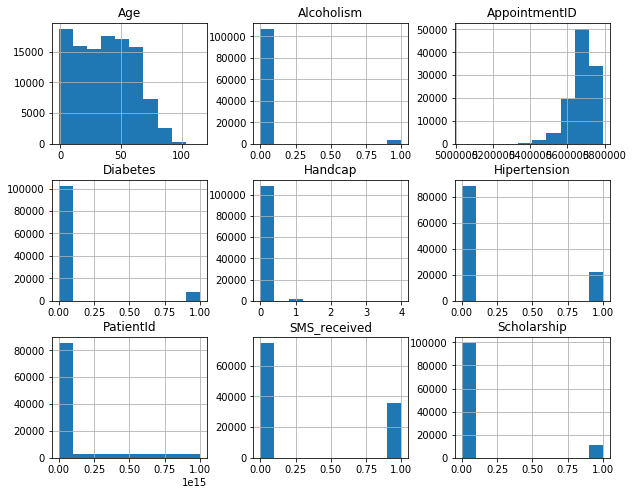

In [60]:
# Generating histograms
df.hist(figsize=(10,8));

The distribution of the different numbers of handicaps is very low in proportion to the number of disabilities. It might be sufficient to differentiate between disabled versus non-disabled instead of listing the disability counts.

*Gender*, *No_show*, *ScheduledDay*, and *AppointmentDay* are not displayed in both df.describe and the histograms, due to their datatype. Before cleaning the data, information on gender distribution, no-show vs showed distribution and appointment date and scheduling time distributions are going to be inspected. 

In [61]:
# Calculating and printing the gender distribution
print("Gender Distribution:")
print(df.groupby(['Gender']).size())

Gender Distribution:
Gender
F    71840
M    38687
dtype: int64


In [62]:
# Calculating the proportion of male and female patients
female = df.groupby(['Gender']).size()[0]/(df.groupby(['Gender']).size()[0]+df.groupby(['Gender']).size()[1])
male = df.groupby(['Gender']).size()[1]/(df.groupby(['Gender']).size()[0]+df.groupby(['Gender']).size()[1])
# Printing the proportions as percentages
print("Male patients: {:.2f}%".format(male*100))
print("Female patients: {:.2f}%".format(female*100))

Male patients: 35.00%
Female patients: 65.00%


35% of the patients are male, 65% are female.

In [63]:
# Calculating and printing the distribution of showed vs no-show
print("No-Show vs Showed Distribution:")
print(df.groupby(['No-show']).size())

No-Show vs Showed Distribution:
No-show
No     88208
Yes    22319
dtype: int64


In [64]:
# Calculating the proportion of patients showing and not showing at appointments
showed = df.groupby(['No-show']).size()[0]/(df.groupby(['No-show']).size()[0]+df.groupby(['No-show']).size()[1])
no_show = df.groupby(['No-show']).size()[1]/(df.groupby(['No-show']).size()[0]+df.groupby(['No-show']).size()[1])

# Printing the proportion as percentage value
print("Percentage of patients showing to their appointment: {:.2f}%".format(showed*100))
print("Percentage of no-show appointments: {:.2f}%".format(no_show*100))

Percentage of patients showing to their appointment: 79.81%
Percentage of no-show appointments: 20.19%


For approximately 80% of the appointments, the patients showed up. For approx. 20% they didn't show.

In [65]:
# When did the appointments take place?
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

The appointments took place between the 29th of April 2016 and the 8th of June 2016.

In [66]:
# When have the appointments been scheduled?
df.ScheduledDay.min(), df.ScheduledDay.max()

('2015-11-10T07:13:56Z', '2016-06-08T20:07:23Z')

The appointments were scheduled between the 10th of November 2015 and the 8th of June 2016. It seems like the waiting time between scheduling of the appointment ranges from same-day appointments to appointments that have been scheduled several months in advance. 


### Data Cleaning


After inspecting the datset, it becomes clear, that some data will be easier to analyze after cleaning. 

*PatientId* and *AppointmentID* will probably not be part of this analysis, still, they will be kept in the dataset. This allows to e.g. segment by patients with singular or multiple appointments within the dataset, if needed. As *PatientId* is currently a float, it will be **converted to an integer**. 

An *Age* of -1 seems like a data inconsistency, this value will be evaluated further before deciding whether to **drop** this data. 

*ScheduledDay* and *AppointmentDay* will be **converted to datetime objects**, to make datetime related manipulations possible. 

The five values of *Handcap* are interpreted as indicating how many disabilities a patient has. To simplify the analysis, the values 1, 2, 3, 4, are **converted to '1'** - indicating whether or not a patient has disabilities. 

To avoid confusion in the analysis, **the values "Yes" and "No" in the *No-show* column are renamed to "No-Show" and "Showed"**

Last, **all column names are renamed**, to fix typos and have easier (lowercase) column names for further operations. 

In [67]:
# Converting PatientId to integer
df['PatientId'] = df['PatientId'].astype('int64')

In [68]:
# Inspecting rows with Age == -1
age_neg = df[df['Age'] == -1]
age_neg

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Only one record has a negative age. It seems like the negative age is a typo. As only one of 110k plus records, it seems neglectable, and this row will be dropped.

In [69]:
# Dropping Age == -1
df.drop(df[df['Age'] == -1].index, inplace=True)

To convert *ScheduledDay* and *AppointmentDay* to datetime, pandas .to_datetime function was used. Only *ScheduledDay* has distinct timestamp information. To simplify the calculation of waiting time, the timestamps will be removed using the dt.date function Source: Pandas documentation. 

In [70]:
# Converting ScheduledDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],infer_datetime_format=True).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], infer_datetime_format=True).dt.date.astype('datetime64[ns]')

Next, the *Handcap* values are manipulated, to only have the values 0 and 1 left.

In [71]:
# Replacing the Handcap values 2, 3, and 4 with 1
df['Handcap'].replace([2, 3, 4], 1, inplace=True)

Now, the *No-show* values are manipulated, to avoid confusion about who showed and who didn't.

In [72]:
# Renaming No-show values
df['No-show'] = df['No-show'].map({ 'No': 'Showed', 'Yes': 'No-show' })

Finally, the columns are renamed to be all lowercase and use underscores where appropriate

In [73]:
# Renaming columns to be all lowercase and use underscores
new_col_names = {'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 
                    'Gender': 'gender', 'ScheduledDay': 'scheduled_day', 
                    'AppointmentDay': 'appointment_day', 'Age': 'age', 
                    'Neighbourhood': 'neighbourhood', 'Scholarship': 'scholarship', 
                    'Hipertension': 'hypertension', 'Diabetes': 'diabetes', 
                    'Alcoholism': 'alcoholism', 'Handcap': 'handicap', 
                    'SMS_received': 'sms_received', 'No-show': 'no_show'}
df.rename(columns= new_col_names, inplace=True)

After cleaning the data, df.head() and df.info() are used to inspect the changes.

In [74]:
# Viewing the first 5 records again
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Showed
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed


In [75]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110526 non-null  int64         
 1   appointment_id   110526 non-null  int64         
 2   gender           110526 non-null  object        
 3   scheduled_day    110526 non-null  datetime64[ns]
 4   appointment_day  110526 non-null  datetime64[ns]
 5   age              110526 non-null  int64         
 6   neighbourhood    110526 non-null  object        
 7   scholarship      110526 non-null  int64         
 8   hypertension     110526 non-null  int64         
 9   diabetes         110526 non-null  int64         
 10  alcoholism       110526 non-null  int64         
 11  handicap         110526 non-null  int64         
 12  sms_received     110526 non-null  int64         
 13  no_show          110526 non-null  object        
dtypes: datetime64[ns](2)

<a id='eda'></a>
## Exploratory Data Analysis

Based on the findings of the Data Wrangling phase, the data analysis will focus on three characteristics of the dataset. First, it will be investigated if patients with healthcare scholarships are more likely to show up to their appointments. Then, the effect of SMS reminders on no-show proportions is explored. Finally, the effect of a longer or shorter waiting time before the appointment is taken into consideration. 

To revisit the distribution of the dependent variable, a visualization of showed vs no-show is plotted. 

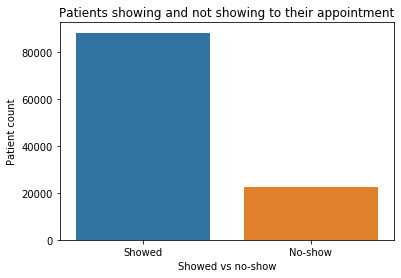

In [76]:
# Plotting count of showed vs. no-show appointments
ax = sns.countplot(x=df.no_show, data=df)
ax.set_title("Patients showing and not showing to their appointment")
plt.ylabel('Patient count')
plt.xlabel('Showed vs no-show')
plt.show()

As seen earlier, at around 80% of the appointments, the patient showed up. 

<a id='RQ1'></a>
### Research Question 1: Are patients with healthcare scholarships more, less or equally likely to show up to their appointment than those without?

Around 10% of the patients in the dataset are part of the Bolsa Familia program. Could scholarship membership influence the likelihood of patients showing to appointments? 

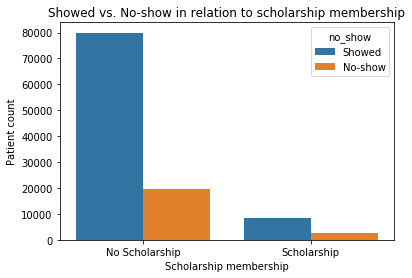

In [77]:
# Plotting the distribution of showed vs no-show for scholarship members and non-scholarship members
ax = sns.countplot(x=df.scholarship, hue=df.no_show, data=df)
ax.set_title("Showed vs. No-show in relation to scholarship membership")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Patient count')
plt.xlabel('Scholarship membership')
plt.show()

It will be easier to directly compare the proportion of patients that showed to their appointment with or without scholarship. 

scholarship
0    0.801926
1    0.762637
dtype: float64


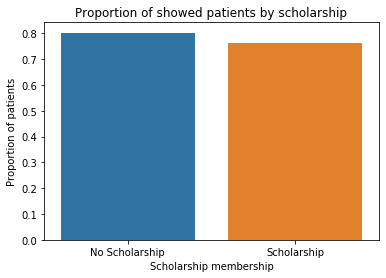

In [78]:
# Percentage of appointments, where the patient showed for scholarship recipients and non-recipients
df_scholarship_ratio = df[df.no_show == 'Showed'].groupby(['scholarship']).size()/df.groupby(['scholarship']).size()

# Plot the difference
ax = sns.barplot(x=df_scholarship_ratio.index, y=df_scholarship_ratio)
print(df_scholarship_ratio)
ax.set_title("Proportion of showed patients by scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Proportion of patients')
plt.xlabel('Scholarship membership')
plt.show()

Judging from above graph, it seems that appointments with patients without Bolsa Familia scholarship had a higher show-rate than appointments with patients with the scholarship. 

Until now, only the correlation between *scholarship* and *no_show* has been evaluated. Do the results hold, if other independent variables are mixed in? In the following steps, the influence of *gender*, *age*, and *sms_received* on scholarship recipients' and non-scholarship recipients' showed percentage at appointments will be evaluated. 

#### Does the difference in showed percentage for scholarship and non-scholarship recipients hold up for different genders?

Are there differences in showed vs no-show based on gender?

gender
F    0.796851
M    0.800321
dtype: float64


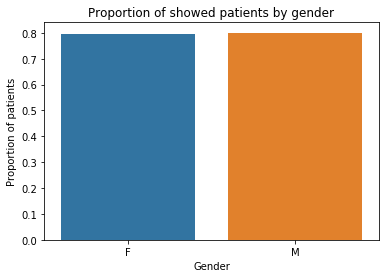

In [79]:
# Calculating ratios
df_gender_ratio = df[df.no_show == 'Showed'].groupby(['gender']).size()/df.groupby(['gender']).size()

# Plotting the difference
ax = sns.barplot(x=df_gender_ratio.index, y=df_gender_ratio)
print(df_gender_ratio)
ax.set_title("Proportion of showed patients by gender")
plt.ylabel('Proportion of patients')
plt.xlabel('Gender')
plt.show()

From above visualization it seems like gender is not correlated to the likelihood whether a patient shows or does not show to their appointment. But what happens, if the two independent variables *scholarship* and *gender* and their joint influence on *no-show* are mixed?

In [80]:
# Creating masks for gender distributions
male = df.query('gender == "M"')
female = df.query('gender == "F"')

# Creating masks for distribution of scholarship membership by gender
female_scholarship = female.query('scholarship == 1')
female_no_scholarship = female.query('scholarship == 0')
male_scholarship = male.query('scholarship == 1')
male_no_scholarship = male.query('scholarship == 0')

# Getting counts for distribution of scholarship membership by gender
female_scholarship_showed = female_scholarship.groupby('no_show')['appointment_id'].count()
female_no_scholarship_showed = female_no_scholarship.groupby('no_show')['appointment_id'].count()
male_scholarship_showed = male_scholarship.groupby('no_show')['appointment_id'].count()
male_no_scholarship_showed = male_no_scholarship.groupby('no_show')['appointment_id'].count()

# Getting proportions of appointments were patients showed for each gender
female_scholarship_showed_proportion = female_scholarship_showed/female_scholarship_showed.sum()
female_no_scholarship_showed_proportion = female_no_scholarship_showed/female_no_scholarship_showed.sum()
male_scholarship_showed_proportion = male_scholarship_showed/male_scholarship_showed.sum()
male_no_scholarship_showed_proportion = male_no_scholarship_showed/male_no_scholarship_showed.sum()

# Create a dataframe containing both proportions together
scholarship_gender_showed_proportion_df = pd.DataFrame({
    'Scholarship': [female_scholarship_showed_proportion['Showed'], male_scholarship_showed_proportion['Showed']],
    'No Scholarship': [female_no_scholarship_showed_proportion['Showed'], male_no_scholarship_showed_proportion['Showed']]}, 
    index=['Female', 'Male'])

After creating the dataframe, the proportions are plotted.

        Scholarship  No Scholarship
Female     0.762115        0.801734
Male       0.764940        0.802257


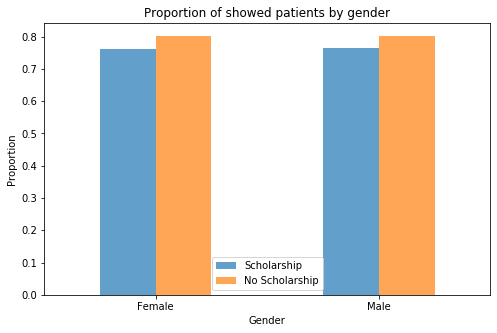

In [81]:
# Plot the proportion
scholarship_gender_showed_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8,5))
print(scholarship_gender_showed_proportion_df)
plt.legend()
plt.title('Proportion of showed patients by gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show();

The showed percentage for scholarship vs non-scholarship recipients is almost identical for each gender. 

#### Does the difference in showed percentage for scholarship and non-scholarship recipients hold up for different age groups?

Are there differences in showed vs no-show based on age? First, a boxplot of patient ages is used to visualize the age distribution.

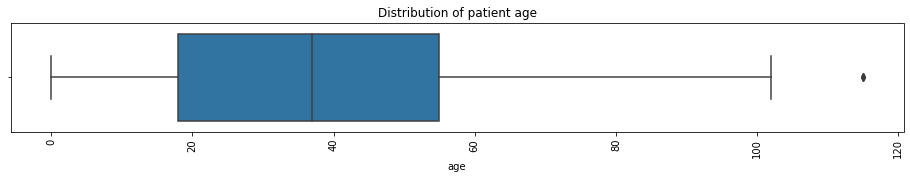

In [122]:
# Creating a boxplot chart of patient ages
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
sns.boxplot(x=df.age);
plt.title('Distribution of patient age');

As previously seen in the data wrangling phase, the sample is relatively young, with a median of 37, and 75% of the patients being under 55. Nevertheless, the whiskers range from 0 to over 100, with one outlier at 115. 

Next, the patient count per age for appointments, where the patient showed, is plotted in a histogram. Afterwards, conclusions for suitable age group containers are drawn. 

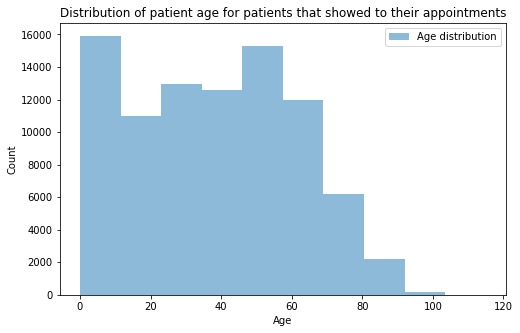

In [83]:
# Plot the distribution of age for those who showed up
showed = df.query('no_show == "Showed"')
showed_ages = showed['age']
showed_ages.name = 'Age distribution'
showed_ages.plot(kind='hist', alpha=0.5, figsize=(8,5))
plt.legend()
plt.title('Distribution of patient age for patients that showed to their appointments')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show();

Above visualization shows a high count of children and teens, almost as high as the group of patients aged 60 plus. To simplify the evaluation, the patient ages are divided into the following groups: '0 to 10', '11 to 19', '20 to 39', '40 to 59', '60+'. 

In [84]:
# Bin edges used for cutting the data into groups
age_edges = [-1, 10, 19, 39, 59, 115] 

# Labels for the age groups
age_labels = ['0 to 10', '11 to 19', '20 to 39', '40 to 59', '60+']

# Creating age group column
df['age_group'] = pd.cut(df['age'], age_edges, labels=age_labels)

# Checking for successful creation of this column
df.sample(5)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
18143,2479876231816,5688966,F,2016-05-12,2016-05-12,58,SANTA MARTHA,0,0,0,0,0,0,Showed,40 to 59
11855,4716263131813,5722683,M,2016-05-20,2016-05-20,66,REDENÇÃO,0,1,0,0,0,0,Showed,60+
84126,5186247767215,5780962,M,2016-06-07,2016-06-07,4,RESISTÊNCIA,0,0,0,0,0,0,Showed,0 to 10
1456,283778519653868,5642306,M,2016-04-29,2016-04-29,51,VILA RUBIM,0,0,0,0,0,0,Showed,40 to 59
64919,32676433343,5542757,F,2016-04-05,2016-05-19,68,JARDIM CAMBURI,0,0,0,0,0,0,Showed,60+


After creating the age groups, the proportion of showed patients per age group is visualized. 

age_group
0 to 10     0.797963
11 to 19    0.746784
20 to 39    0.768618
40 to 59    0.811918
60+         0.846880
dtype: float64


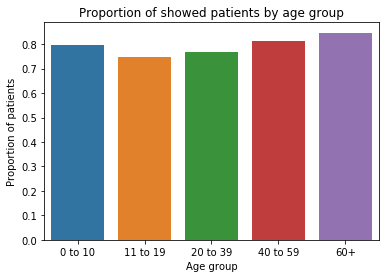

In [85]:
# Calculating ratios
df_age_ratio = df[df.no_show == 'Showed'].groupby(['age_group']).size()/df.groupby(['age_group']).size()

# Plotting the difference
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
print(df_age_ratio)
ax.set_title("Proportion of showed patients by age group")
plt.ylabel('Proportion of patients')
plt.xlabel('Age group')
plt.show();

Almost 80% of children show to their appointments, but only around 75% of teenagers. In the increasing age groups, the attendance increases, with 20 to 39 at 77%, 40 to 59 at 81%, and 60+ at 85%. 

How does the showed up proportion look like, when influence of scholarship membership and age group are mixed? 

In [86]:
# Creating masks for age groups
child = df.query('age_group == "0 to 10"')
teen = df.query('age_group == "11 to 19"')
twenty_plus = df.query('age_group == "20 to 39"')
forty_plus = df.query('age_group == "40 to 59"')
sixty_plus = df.query('age_group == "60+"')

# Creating masks for showed patients with and without scholarship
child_scholarship = child.query('scholarship == 1')
child_no_scholarship = child.query('scholarship == 0')
teen_scholarship = teen.query('scholarship == 1')
teen_no_scholarship = teen.query('scholarship == 0')
twenty_plus_scholarship = twenty_plus.query('scholarship == 1')
twenty_plus_no_scholarship = twenty_plus.query('scholarship == 0')
forty_plus_scholarship = forty_plus.query('scholarship == 1')
forty_plus_no_scholarship = forty_plus.query('scholarship == 0')
sixty_plus_scholarship = sixty_plus.query('scholarship == 1')
sixty_plus_no_scholarship = sixty_plus.query('scholarship == 0')

# Getting counts for distribution of scholarship membership by age group
child_scholarship_showed = child_scholarship.groupby('no_show')['appointment_id'].count()
child_no_scholarship_showed = child_no_scholarship.groupby('no_show')['appointment_id'].count()
teen_scholarship_showed = teen_scholarship.groupby('no_show')['appointment_id'].count()
teen_no_scholarship_showed = teen_no_scholarship.groupby('no_show')['appointment_id'].count()
twenty_plus_scholarship_showed = twenty_plus_scholarship.groupby('no_show')['appointment_id'].count()
twenty_plus_no_scholarship_showed = twenty_plus_no_scholarship.groupby('no_show')['appointment_id'].count()
forty_plus_scholarship_showed = forty_plus_scholarship.groupby('no_show')['appointment_id'].count()
forty_plus_no_scholarship_showed = forty_plus_no_scholarship.groupby('no_show')['appointment_id'].count()
sixty_plus_scholarship_showed = sixty_plus_scholarship.groupby('no_show')['appointment_id'].count()
sixty_plus_no_scholarship_showed = sixty_plus_no_scholarship.groupby('no_show')['appointment_id'].count()

# Getting proportions of appointments were patients showed for each age group
child_scholarship_showed_proportion = child_scholarship_showed/child_scholarship_showed.sum()
child_no_scholarship_showed_proportion = child_no_scholarship_showed/child_no_scholarship_showed.sum()
teen_scholarship_showed_proportion = teen_scholarship_showed/teen_scholarship_showed.sum()
teen_no_scholarship_showed_proportion = teen_no_scholarship_showed/teen_no_scholarship_showed.sum()
twenty_plus_scholarship_showed_proportion = twenty_plus_scholarship_showed/twenty_plus_scholarship_showed.sum()
twenty_plus_no_scholarship_showed_proportion = twenty_plus_no_scholarship_showed/twenty_plus_no_scholarship_showed.sum()
forty_plus_scholarship_showed_proportion = forty_plus_scholarship_showed/forty_plus_scholarship_showed.sum()
forty_plus_no_scholarship_showed_proportion = forty_plus_no_scholarship_showed/forty_plus_no_scholarship_showed.sum()
sixty_plus_scholarship_showed_proportion = sixty_plus_scholarship_showed/sixty_plus_scholarship_showed.sum()
sixty_plus_no_scholarship_showed_proportion = sixty_plus_no_scholarship_showed/sixty_plus_no_scholarship_showed.sum()

# Create a dataframe containing both proportions together
scholarship_age_showed_proportion_df = pd.DataFrame({
    'Scholarship': [child_scholarship_showed_proportion['Showed'], teen_scholarship_showed_proportion['Showed'], twenty_plus_scholarship_showed_proportion['Showed'], forty_plus_scholarship_showed_proportion['Showed'], sixty_plus_scholarship_showed_proportion['Showed']],
    'No Scholarship': [child_no_scholarship_showed_proportion['Showed'], teen_no_scholarship_showed_proportion['Showed'], twenty_plus_no_scholarship_showed_proportion['Showed'], forty_plus_no_scholarship_showed_proportion['Showed'], sixty_plus_no_scholarship_showed_proportion['Showed']]}, 
    index=['0 to 10', '11 to 19', '20 to 39', '40 to 59', '60+'])

After creating a dataframe of showed proportions for scholarship recipients and non-recipients by age group, the proportions are plotted.

          Scholarship  No Scholarship
0 to 10      0.770903        0.800826
11 to 19     0.734491        0.748756
20 to 39     0.750796        0.771552
40 to 59     0.774263        0.815757
60+          0.841216        0.847043


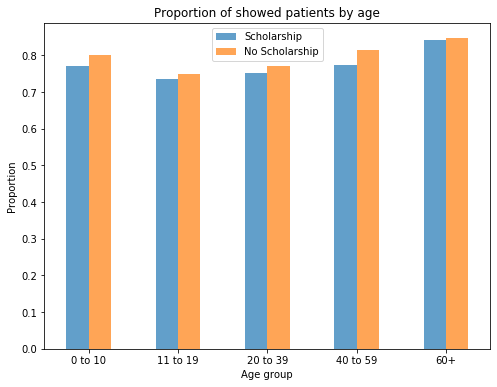

In [87]:
# Plot the proportion
scholarship_age_showed_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8,6))
print(scholarship_age_showed_proportion_df)
plt.legend()
plt.title('Proportion of showed patients by age')
plt.ylabel('Proportion')
plt.xlabel('Age group')
plt.xticks(rotation=0)
plt.show();

Overall, it is still visible, that scholarship recipients showed less often at appointments than non-recipients. 

At the same time, the differences in showed proportions for scholarship recipients and non-recipients were higher or lower in different age intervals. In the age group of 40 to 59, the delta is at around 4%, and thereby closest to the delta of all scholarship recipients vs non-recipients. Next, there are around 3% and around 2% in the age group of 0 to 10 and 20 to 39. In the age group with the lowest overall showed rate (teenagers) and highest overall showed rate (60+), the difference between scholarship recipients and non-recipients in relation to showing at appointments has been lowest. 

#### Does the difference in showed percentage for scholarship and non-scholarship recipients hold up for SMS receival vs no SMS receival?

Lastly, the two independent variables *scholarship* and *sms_received* are mixed, and their joint influence on *no-show* is evaluated.

In [88]:
# Creating masks for sms receival
sms = df.query('sms_received == 1')
no_sms = df.query('sms_received == 0')

# Creating masks for distribution of scholarship membership by gender
sms_scholarship = sms.query('scholarship == 1')
sms_no_scholarship = sms.query('scholarship == 0')
no_sms_scholarship = no_sms.query('scholarship == 1')
no_sms_no_scholarship = no_sms.query('scholarship == 0')

# Getting counts for distribution of scholarship membership by gender
sms_scholarship_showed = sms_scholarship.groupby('no_show')['appointment_id'].count()
sms_no_scholarship_showed = sms_no_scholarship.groupby('no_show')['appointment_id'].count()
no_sms_scholarship_showed = no_sms_scholarship.groupby('no_show')['appointment_id'].count()
no_sms_no_scholarship_showed = no_sms_no_scholarship.groupby('no_show')['appointment_id'].count()

# Getting proportions of appointments were patients showed for each gender
sms_scholarship_showed_proportion = sms_scholarship_showed/sms_scholarship_showed.sum()
sms_no_scholarship_showed_proportion = sms_no_scholarship_showed/sms_no_scholarship_showed.sum()
no_sms_scholarship_showed_proportion = no_sms_scholarship_showed/no_sms_scholarship_showed.sum()
no_sms_no_scholarship_showed_proportion = no_sms_no_scholarship_showed/no_sms_no_scholarship_showed.sum()

# Create a dataframe containing both proportions together
scholarship_sms_showed_proportion_df = pd.DataFrame({
    'Scholarship': [sms_scholarship_showed_proportion['Showed'], no_sms_scholarship_showed_proportion['Showed']],
    'No Scholarship': [sms_no_scholarship_showed_proportion['Showed'], no_sms_no_scholarship_showed_proportion['Showed']]}, 
    index=['SMS', 'No SMS'])

After creating a dataframe of showed proportions for scholarship recipients and non-recipients by sms receival, the proportions are plotted.

        Scholarship  No Scholarship
SMS        0.662197        0.731057
No SMS     0.810495        0.835407


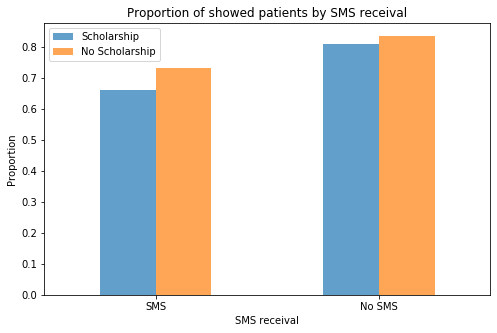

In [89]:
# Plot the proportion
scholarship_sms_showed_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8,5))
print(scholarship_sms_showed_proportion_df)
plt.legend()
plt.title('Proportion of showed patients by SMS receival')
plt.ylabel('Proportion')
plt.xlabel('SMS receival')
plt.xticks(rotation=0)
plt.show();

Overall, SMS recipients had lower proportions of showing to appointments. The combination of having a scholarship and an SMS reminder had the lowest proportion of showed patients (ca. 66%), no SMS and no scholarship the highest proportion (ca. 83,5%). For non-SMS recipients, the difference between showed proportions for scholarship recipients and non-recipients (ca. 2,5%) has been a lot lower than for SMS recipients (ca. 7%). 

*sms_received* seems to be connected to showed up proportions. In the next research question, this characteristic is going to be evaluated further. 

<a id='RQ2'></a>
### Research Question 2: Are SMS notified patients more, less or equally likely to show up to their appointment than non-notified patients?

For ca. 32% of the appointments, patients received SMS reminders. Could the receival of an SMS reminder influence the likelihood of patients showing to appointments?

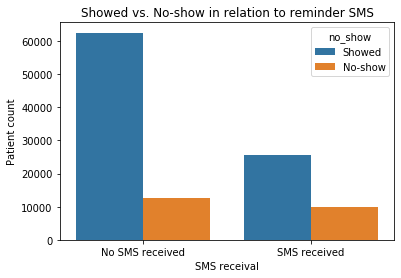

In [90]:
# Plotting the distribution of showed vs no-show for patients that received SMS-notification and those that didn't
ax = sns.countplot(x=df.sms_received, hue=df.no_show, data=df)
ax.set_title("Showed vs. No-show in relation to reminder SMS")
x_ticks_labels=['No SMS received', 'SMS received']
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Patient count')
plt.xlabel('SMS receival')
plt.show()

Again, a graph of showed proportions is plotted, to directly compare the proportion of patients that showed to their appointment with or without sms.

sms_received
0    0.832965
1    0.724255
dtype: float64


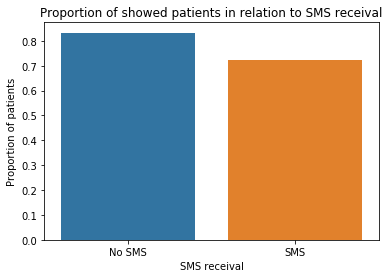

In [123]:
# Percentage of appointments, where the patient showed and received an SMS reminder or not
df_sms_ratio = df[df.no_show == 'Showed'].groupby(['sms_received']).size()/df.groupby(['sms_received']).size()
print(df_sms_ratio)

# Plot the difference
ax = sns.barplot(x=df_sms_ratio.index, y=df_sms_ratio)
ax.set_title("Proportion of showed patients in relation to SMS receival")
x_ticks_labels=['No SMS', 'SMS']
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Proportion of patients')
plt.xlabel('SMS receival')
plt.show()

As expected due to the results from RQ1's SMS receival plot, appointments with patients without receival of SMS reminders had a higher show-rate than appointments with patients that received SMS reminders. The proportion of showed patients without SMS reminder is almost 11% higher than the ones without SMS reminders.

Until now, only  *sms_received* and *no_show* have been evaluated together. Do the results hold, if other independent variables are mixed in? In the following steps, the influence of *age*, *diabetes* and *hypertension* on sms recipients' and no sms recipients' showed percentage at appointments are evaluated. 

#### Does the difference in showed percentage for SMS and non-SMS recipients hold up for different age groups?

How does the showed up proportion look like, when influence of sms receival and age group are mixed?

In [104]:
# Creating masks for showed patients with and without sms
child_sms = child.query('sms_received == 1')
child_no_sms = child.query('sms_received  == 0')
teen_sms = teen.query('sms_received  == 1')
teen_no_sms = teen.query('sms_received  == 0')
twenty_plus_sms = twenty_plus.query('sms_received  == 1')
twenty_plus_no_sms = twenty_plus.query('sms_received  == 0')
forty_plus_sms = forty_plus.query('sms_received  == 1')
forty_plus_no_sms = forty_plus.query('sms_received  == 0')
sixty_plus_sms = sixty_plus.query('sms_received  == 1')
sixty_plus_no_sms = sixty_plus.query('sms_received  == 0')

# Getting counts for distribution of sms receival by age group
child_sms_showed = child_sms.groupby('no_show')['appointment_id'].count()
child_no_sms_showed = child_no_sms.groupby('no_show')['appointment_id'].count()
teen_sms_showed = teen_sms.groupby('no_show')['appointment_id'].count()
teen_no_sms_showed = teen_no_sms.groupby('no_show')['appointment_id'].count()
twenty_plus_sms_showed = twenty_plus_sms.groupby('no_show')['appointment_id'].count()
twenty_plus_no_sms_showed = twenty_plus_no_sms.groupby('no_show')['appointment_id'].count()
forty_plus_sms_showed = forty_plus_sms.groupby('no_show')['appointment_id'].count()
forty_plus_no_sms_showed = forty_plus_no_sms.groupby('no_show')['appointment_id'].count()
sixty_plus_sms_showed = sixty_plus_sms.groupby('no_show')['appointment_id'].count()
sixty_plus_no_sms_showed = sixty_plus_no_sms.groupby('no_show')['appointment_id'].count()

# Getting proportions of appointments were patients showed for each age group
child_sms_showed_proportion = child_sms_showed/child_sms_showed.sum()
child_no_sms_showed_proportion = child_no_sms_showed/child_no_sms_showed.sum()
teen_sms_showed_proportion = teen_sms_showed/teen_sms_showed.sum()
teen_no_sms_showed_proportion = teen_no_sms_showed/teen_no_sms_showed.sum()
twenty_plus_sms_showed_proportion = twenty_plus_sms_showed/twenty_plus_sms_showed.sum()
twenty_plus_no_sms_showed_proportion = twenty_plus_no_sms_showed/twenty_plus_no_sms_showed.sum()
forty_plus_sms_showed_proportion = forty_plus_sms_showed/forty_plus_sms_showed.sum()
forty_plus_no_sms_showed_proportion = forty_plus_no_sms_showed/forty_plus_no_sms_showed.sum()
sixty_plus_sms_showed_proportion = sixty_plus_sms_showed/sixty_plus_sms_showed.sum()
sixty_plus_no_sms_showed_proportion = sixty_plus_no_sms_showed/sixty_plus_no_sms_showed.sum()

# Create a dataframe containing both proportions together
sms_age_showed_proportion_df = pd.DataFrame({
    'SMS': [child_sms_showed_proportion['Showed'], teen_sms_showed_proportion['Showed'], twenty_plus_sms_showed_proportion['Showed'], forty_plus_sms_showed_proportion['Showed'], sixty_plus_sms_showed_proportion['Showed']],
    'No SMS': [child_no_sms_showed_proportion['Showed'], teen_no_sms_showed_proportion['Showed'], twenty_plus_no_sms_showed_proportion['Showed'], forty_plus_no_sms_showed_proportion['Showed'], sixty_plus_no_sms_showed_proportion['Showed']]}, 
    index=['0 to 10', '11 to 19', '20 to 39', '40 to 59', '60+'])

After creating a dataframe of showed proportions for SMS recipients and non-recipients by age group, the proportions are plotted.

               SMS    No SMS
0 to 10   0.710521  0.833584
11 to 19  0.660734  0.784290
20 to 39  0.669202  0.820190
40 to 59  0.753019  0.841355
60+       0.807779  0.864718


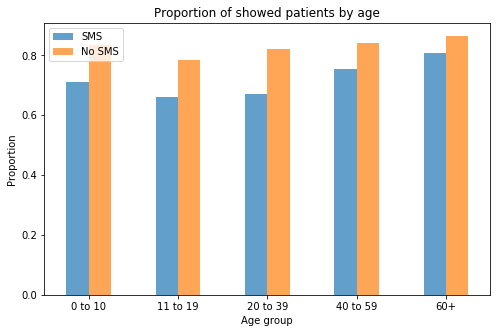

In [106]:
# Plot the proportion
sms_age_showed_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8,5))
print(sms_age_showed_proportion_df)
plt.legend()
plt.title('Proportion of showed patients by age')
plt.ylabel('Proportion')
plt.xlabel('Age group')
plt.xticks(rotation=0)
plt.show();

Overall, it is still visible, that SMS recipients had lower proportions of showing to appointments than non-recipients. At the same time, the age intervals have differences of how much the proportions differ between the two groups.

In the age groups of 0 to 10 and 11 to 19, the delta is at ca. 12%, and thereby closest to the delta of all SMS recipients vs non-recipients. The highest delta between SMS recipients and non-recipients, with around 15%, is at the age of 20 to 39. For patients over 40, the delta decreases to ca. 8%, with the lowest difference of showed proportions for SMS recipients and non-recipients in the age group of 60+ (ca. 6%).

#### Does the difference in showed percentage for sms and no sms recipients hold up for patients with health pre-conditions, such as diabetes?

Are there differences in showed vs no-show based on suffering from diabetes or not?

diabetes
0    0.796370
1    0.819967
dtype: float64


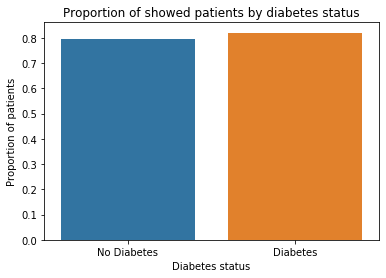

In [108]:
# Calculating ratios
df_diabetes_ratio = df[df.no_show == 'Showed'].groupby(['diabetes']).size()/df.groupby(['diabetes']).size()

# Plotting the difference
ax = sns.barplot(x=df_diabetes_ratio.index, y=df_diabetes_ratio)
print(df_diabetes_ratio)
ax.set_title("Proportion of showed patients by diabetes status")
plt.ylabel('Proportion of patients')
plt.xlabel('Diabetes status')
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show;

From above visualization it seems like patients with diabetes showed up to their appointments in slightly higher proportions than patients without diabetes. But what happens, if the two independent variables *sms_received* and *diabetes* and their joint influence on *no-show* are mixed?

In [115]:
# Creating masks for diabetes
diabetes = df.query('diabetes == 1')
no_diabetes = df.query('diabetes == 0')

# Creating masks for showed patients with and without diabetes
diabetes_sms = diabetes.query('sms_received == 1')
diabetes_no_sms = diabetes.query('sms_received  == 0')
no_diabetes_sms = no_diabetes.query('sms_received  == 1')
no_diabetes_no_sms = no_diabetes.query('sms_received  == 0')

# Getting counts for distribution of sms receival by diabetes status
diabetes_sms_showed = diabetes_sms.groupby('no_show')['appointment_id'].count()
diabetes_no_sms_showed = diabetes_no_sms.groupby('no_show')['appointment_id'].count()
no_diabetes_sms_showed = no_diabetes_sms.groupby('no_show')['appointment_id'].count()
no_diabetes_no_sms_showed = no_diabetes_no_sms.groupby('no_show')['appointment_id'].count()

# Getting proportions of appointments were patients showed for each age group
diabetes_sms_showed_proportion = diabetes_sms_showed/diabetes_sms_showed.sum()
diabetes_no_sms_showed_proportion = diabetes_no_sms_showed/diabetes_no_sms_showed.sum()
no_diabetes_sms_showed_proportion = no_diabetes_sms_showed/no_diabetes_sms_showed.sum()
no_diabetes_no_sms_showed_proportion = no_diabetes_no_sms_showed/no_diabetes_no_sms_showed.sum()

# Create a dataframe containing both proportions together
sms_diabetes_showed_proportion_df = pd.DataFrame({
    'SMS': [diabetes_sms_showed_proportion['Showed'], no_diabetes_sms_showed_proportion['Showed']],
    'No SMS': [diabetes_no_sms_showed_proportion['Showed'], no_diabetes_no_sms_showed_proportion['Showed']]}, 
    index=['Diabetes', 'No Diabetes'])

After creating a dataframe of showed proportions for SMS recipients and non-recipients by diabetes diagnosis, the proportions are plotted.

                  SMS    No SMS
Diabetes     0.769100  0.841418
No Diabetes  0.721065  0.832285


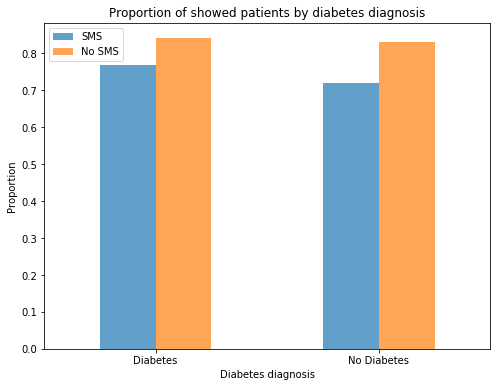

In [126]:
# Plot the proportion
sms_diabetes_showed_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8,6))
print(sms_diabetes_showed_proportion_df)
plt.legend()
plt.title('Proportion of showed patients by diabetes diagnosis')
plt.ylabel('Proportion')
plt.xlabel('Diabetes diagnosis')
plt.xticks(rotation=0)
plt.show();

While on average, patients with diabetes showed at their appointments at a higher proportion than those without, patients with no diabetes and no sms reminder showed in higher proportion than patients with diabetes and an SMS reminder. The combination of having no diabetes and an SMS reminder had the lowest proportion of showed patients (ca. 72%), no SMS and diabetes  the highest proportion (ca. 84%). For patients with diabetes, the difference between showed proportions for sms recipients and non-recipients (ca. 8%) has been lower than for patients without diabetes (ca. 11%).

How do other health conditions influence showed vs no-show for patients with and without SMS reminder?

#### Does the difference in showed percentage for sms and no sms recipients hold up for patients with health pre-conditions, such as hypertension?

Are there differences in showed vs no-show based on suffering from hypertension or not?

hypertension
0    0.790961
1    0.826980
dtype: float64


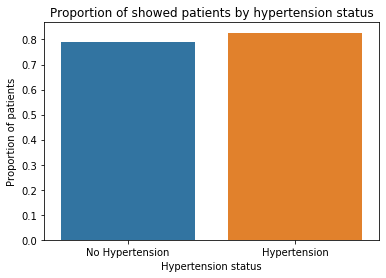

In [112]:
# Calculating ratios
df_hypertension_ratio = df[df.no_show == 'Showed'].groupby(['hypertension']).size()/df.groupby(['hypertension']).size()

# Plotting the difference
ax = sns.barplot(x=df_hypertension_ratio.index, y=df_hypertension_ratio)
print(df_hypertension_ratio)
ax.set_title("Proportion of showed patients by hypertension status")
plt.ylabel('Proportion of patients')
plt.xlabel('Hypertension status')
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show;

From above visualization it seems like patients with diabetes showed up to their appointments in slightly higher proportions than patients without hypertension. But what happens, if the two independent variables *sms_received* and *diabetes* and their joint influence on *no_show* are mixed?

In [118]:
# Creating masks for hypertension
hypertension = df.query('hypertension == 1')
no_hypertension = df.query('hypertension == 0')

# Creating masks for showed patients with and without hypertension
hypertension_sms = hypertension.query('sms_received == 1')
hypertension_no_sms = hypertension.query('sms_received  == 0')
no_hypertension_sms = no_hypertension.query('sms_received  == 1')
no_hypertension_no_sms = no_hypertension.query('sms_received  == 0')

# Getting counts for distribution of sms receival by hypertension status
hypertension_sms_showed = hypertension_sms.groupby('no_show')['appointment_id'].count()
hypertension_no_sms_showed = hypertension_no_sms.groupby('no_show')['appointment_id'].count()
no_hypertension_sms_showed = no_hypertension_sms.groupby('no_show')['appointment_id'].count()
no_hypertension_no_sms_showed = no_hypertension_no_sms.groupby('no_show')['appointment_id'].count()

# Getting proportions of appointments were patients showed for each age group
hypertension_sms_showed_proportion = hypertension_sms_showed/hypertension_sms_showed.sum()
hypertension_no_sms_showed_proportion = hypertension_no_sms_showed/hypertension_no_sms_showed.sum()
no_hypertension_sms_showed_proportion = no_hypertension_sms_showed/no_hypertension_sms_showed.sum()
no_hypertension_no_sms_showed_proportion = no_hypertension_no_sms_showed/no_hypertension_no_sms_showed.sum()

# Create a dataframe containing both proportions together
sms_hypertension_showed_proportion_df = pd.DataFrame({
    'SMS': [hypertension_sms_showed_proportion['Showed'], no_hypertension_sms_showed_proportion['Showed']],
    'No SMS': [hypertension_no_sms_showed_proportion['Showed'], no_hypertension_no_sms_showed_proportion['Showed']]}, 
    index=['Hypertension', 'No Hypertension'])

After creating a dataframe of showed proportions for SMS recipients and non-recipients by hypertension diagnosis, the proportions are plotted.

                      SMS    No SMS
Hypertension     0.775109  0.850847
No Hypertension  0.712044  0.828523


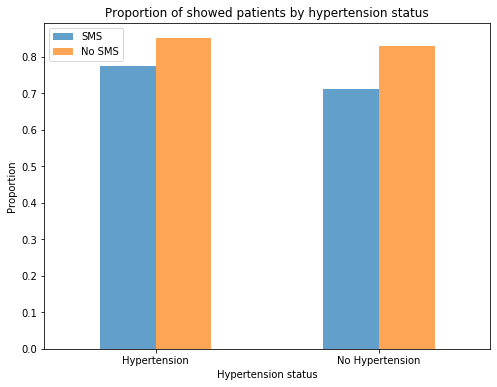

In [119]:
# Plot the proportion
sms_hypertension_showed_proportion_df.plot(kind='bar', alpha=0.70, figsize=(8,6))
print(sms_hypertension_showed_proportion_df)
plt.legend()
plt.title('Proportion of showed patients by hypertension status')
plt.ylabel('Proportion')
plt.xlabel('Hypertension status')
plt.xticks(rotation=0)
plt.show();

While on average, patients with hypertension showed at their appointments at a higher proportion than those without, patients with no hypertension and no sms reminder showed in higher proportion than patients with hypertension and an SMS reminder. The combination of having no hypertension and an SMS reminder has the lowest proportion of showed patients (ca. 71%), no SMS and hypertension the highest proportion (ca. 85%). For patients with hypertension, the difference between showed proportions for sms recipients and non-recipients (ca. 8%) is lower than for patients without hypertension (ca. 11%).

Comparing *hypertension* and *diabetes* mixed with *sms_received* to *no_show*, led to similar results. After evaluating SMS reminders, scholarship membership, age, gender, and two health conditions, the next research question will evaluate another dimension, time. 

<a id='RQ3'></a>
### Research Question 3: Are patients with a shorter waiting time more likely to show up to their appointment?

When initially inspecting the dataset, a range of waiting times from schedule day to appointment day from 0 days to several months has been uncovered. Could the duration of this waiting time influence the likelihood of patients to show to their appointments?

In a first step, a new column is created, that lists the waiting time in days for each appointment. 

In [92]:
# Creating waiting times column
df['waiting_days'] = df.appointment_day - df.scheduled_day
df.waiting_days = df.waiting_days.abs().dt.days

# Check for successful creation
df.tail()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,waiting_days
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,Showed,40 to 59,35
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,Showed,40 to 59,35
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,Showed,20 to 39,41
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,Showed,20 to 39,41
110526,377511518121127,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,Showed,40 to 59,41


By creating a histogram, the distribution of waiting_days can be inspected.

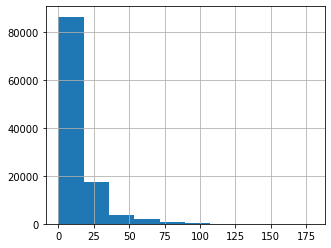

In [93]:
df.waiting_days.hist(figsize=(5,4));

The distribution is skewed to the right, only few appointments have a waiting time above 25 days. Next, the distribution is inspected more closely using .describe()

In [94]:
df.waiting_days.describe()

count    110526.000000
mean         10.183975
std          15.254914
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

50% of all appointments have 4 days or less waiting time. 75% have 15 days or less waiting time. The appointment with the longest waiting time has 179 days between scheduling the appointment and the appointment day. To simplify observations about the showed rate, the *waiting_days* column is used as a basis to create a new column with waiting day categories. The categories are "Same day", "Up to 4 days", "Up to 15 days" and "Up to 179 days". To successfully create the "Same Day" category, -1 is set as the lowest bin edge.

In [95]:
# Bin edges used for cutting the data into groups
waiting_time_edges = [-1, 0, 4, 15, 179] 

# Labels for the waiting time groups
waiting_time_labels = ['Same Day','Up to 4 days','Up to 15 days','Up to 179 days']

# Creating waiting time column
df['waiting_time'] = pd.cut(df['waiting_days'], waiting_time_edges, labels=waiting_time_labels)

# Checking for successful creation of this column
df.sample(5)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,waiting_days,waiting_time
23569,394339722693,5542085,F,2016-04-05,2016-05-24,79,DO QUADRO,0,1,0,0,0,1,Showed,60+,49,Up to 179 days
51618,928177284229892,5710586,F,2016-05-17,2016-05-30,61,CENTRO,0,1,1,0,0,1,Showed,60+,13,Up to 15 days
26373,4923925417261,5689450,M,2016-05-12,2016-05-12,5,DO MOSCOSO,1,0,0,0,0,0,Showed,0 to 10,0,Same Day
42307,52143364956635,5731581,M,2016-05-24,2016-05-30,14,JABOUR,0,0,0,0,0,1,Showed,11 to 19,6,Up to 15 days
17990,831178927165998,5656005,F,2016-05-04,2016-05-04,52,ILHA DAS CAIEIRAS,0,0,0,0,0,0,Showed,40 to 59,0,Same Day


Now, the percentage of appointments, where the patient showed, grouped by *waiting_time* is plotted. 

waiting_time
Same Day          0.953529
Up to 4 days      0.769943
Up to 15 days     0.714591
Up to 179 days    0.672941
dtype: float64


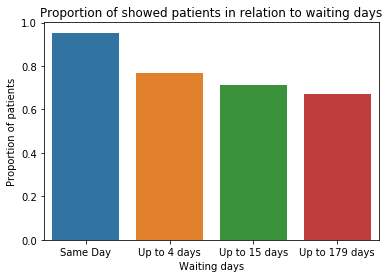

In [131]:
# Percentage of appointments, where the patient showed, grouped by waiting_time
df_waiting_ratio = df[df.no_show == 'Showed'].groupby(['waiting_time']).size()/df.groupby(['waiting_time']).size()
print(df_waiting_ratio)

# Plot the difference
ax = sns.barplot(x=df_waiting_ratio.index, y=df_waiting_ratio)
ax.set_title("Proportion of showed patients in relation to waiting days")
x_ticks_labels = waiting_time_labels
ax.set_xticklabels(x_ticks_labels)
plt.ylabel('Proportion of patients')
plt.xlabel('Waiting days')
plt.show()

Same day appointments had the highest proportion of showed patients. With ca. 95% showed patients, the average over all appointments (ca. 80%) is surpassed by far. The categories with increasing waiting days had decreasing proportions of showed patients, with a proportion of showed patients of only 67% for the longest waiting time. Judging from above graph, waiting time in days is correlated to the likelihood of patients showing or not showing to their appointments. 

<a id='conclusions'></a>
## Conclusions

This report inspected, cleaned and explored a dataset of information from 100k medical appointments in Brazil. After evaluating a range of patient and appointment characteristics, on whether they are connected to higher or lower no-show rate for patients at their appointments, the initial research questions are revisited and answered. 

### RQ1: Are patients with healthcare scholarships more, less or equally likely to show up to their appointment than non-recipients? 

Within this dataset, 9.83% of all patients are part of the Bolsa Familia scholarship. At 79.81% of all appointments, the patient showed.

When comparing patients with and without healthcare scholarship, patients without Bolsa Familia scholarship had a slightly higher showed percentage than the average, namely 80.19%. Patients with the scholarship on the other hand, had a lower showed percentage, with only 76.26%. 

#### Does the difference in showed percentage for scholarship and non-scholarship recipients hold up for different genders?

Within this dataset, 65% of all patients are female, 35% are male. 79.69% of female patients showed to their appointments, 80.03% of male patients.

When comparing patients with and without healthcare scholarship, there are almost no differences between female and male scholarship recipients (76.21% vs 76.49%). The percentages for non-recipients are equally similar (80.17% and 80.23%). 

#### Does the difference in showed percentage for scholarship and non-scholarship recipients hold up for different age groups?

The median age within this dataset, is 37. 75% of the patients are under 55. The ages range from 0 to 115. For the evaluation, age groups of "0 to 10", "11 to 19", "20 to 39", "40 to 59" and "60+" were formed. 79.80% of children showed to their appointments, but only 74.68% of teenagers. With increased age, the attendance increased: *20 to 39* at 76.86%, *40 to 59* at 81.19%, and *60+* at 84.69%. 

When comparing patients with and without healthcare scholarship, the curve of attendance over the age groups is similar, also showing a dip in the age group of 11 to 19. For some age groups, the showed rate of scholarship recipients and non-recipients differs more than for others. 

In the age group of 40 to 59, the delta is at around 4%, and thereby closest to the difference of showed rates of all scholarship recipients vs non-recipients. Next, there are around 3% and around 2% in the age group of 0 to 10 and 20 to 39. In the age group with the lowest overall showed rate (teenagers) and highest overall showed rate (60+), the difference between scholarship recipients and non-recipients in relation to showing at appointments is lowest. 

#### Does the difference in showed percentage for scholarship and non-scholarship recipients hold up for sms recipients vs non-recipients?

Within this dataset, 32% of all patients received an SMS reminder. 72.42% of SMS recipients showed to their appointments, 83.30% of non-recipients.

When comparing patients with and without healthcare scholarship, SMS recipients had lower showed proportions than non-recipients. Patients with scholarship and SMS reminder had the highest no-show rate, patients without scholarship and sms reminder had the lowest.  

SMS recipients' showed rate differs by 7% for scholarship recipients and non recipients. For patients without SMS it only differs by 2.5%.

### RQ2: Are SMS notified patients more, less or equally likely to show up to their appointment than non-notified patients?

As seen above, 72.42% of SMS recipients showed to their appointments, 83.30% of non-recipients.

#### Does the difference in showed percentage for sms and no sms recipients recipients hold up for different age groups?

Overall, it is still visible, that patients that received an SMS reminder had a higher no-show rate at their appointments. In the age groups of "0 to 10" and "11 to 19", the difference for SMS vs. no SMS is at ca. 12%, and thereby closest to the delta of all SMS recipients vs non-recipients. The highest delta between SMS recipients and non-recipients, with around 15%, is at the age of 20 to 39. For patients over 40, the delta decreases to ca. 8%, with the lowest difference of showed proportions for SMS recipients and non-recipients in the age group of 60+ (ca. 6%).

When comparing SMS recipients' and scholarship recipients' proportions of showing for their appointments over different age groups, SMS recipients vs non recipients (low: 11-19, 66.07%; high: 60+, 86.47%) have a wider range than scholarship recipients vs non-recipients (low: 11-19, 73.45%; high: 60+, 84.70%).

#### Does the difference in showed percentage for sms and no sms recipients hold up for patients with health pre-conditions, such as diabetes?

Within this dataset, 7.19% of all patients have diabetes. 82% of diabetics showed to their appointments, 79.64% of non-diabetics. 

When comparing patients with and without sms reminders, diabetics had higher showed proportions than non-diabetics. Patients with SMS reminder and no diabetes had the highest no-show rate, patients without SMS reminder and with diabetes had the lowest.  

Diabetics' showed rate differed by 8% for SMS recipients and non recipients. For non-diabetics it differed by 11%.

#### Does the difference in showed percentage for sms and no sms recipients hold up for patients with health pre-conditions, such as hypertension?

Within this dataset, 19.72% of all patients have hypertension. 82.69% of hypertension patients showed to their appointments, 79.09% of patients without hypertension. 

When comparing patients with and without sms reminders, hypertension patients had higher showed proportions than patients without hypertension. Patients with SMS reminder and no hypertension had the highest no-show rate, patients without SMS reminder and with hypertension had the lowest.  

Hypertension patients' showed rate differed by 8% for SMS recipients and non recipients. For patients without hypertension it differed by 11%.

### RQ3:  Are patients with a shorter waiting time more, less or equally likely to show up to their appointment?

Same day appointments have the highest proportion of showed patients. With ca. 95% showed patients, the average over all appointments (ca. 80%) is surpassed by far. The categories with increasing waiting days have decreasing proportions of showed patients, with a proportion of showed patients of only 67% for the longest waiting time. 

### Summary and limitations

As this has been an exploration without employing statistical tests, no statistical conclusions can be drawn. Nethertheless, the exploration showed, that segmenting the patients into different groups based on different characteristics, leads to an overview of differing showed vs. no-show rates. 

Judging from the results of this investigation, *waiting_time*, *sms_receival*, and *scholarship* are most promising for predicting *no-show*, followed by *age*, and then medical conditions. *gender* does not seem relevant. These are hypotheses, that would need to be investigated further. 

The investigation did not consider a range of other dataset characteristics, e.g. appointment day of the week, amount of appointments per patient, alcoholism or disabilities, or neighborhood location. Also, only a small sample of characteristic combinations has been explored. Therefore, the investigation can be extended in many ways.  